Capture device is open:True
[INFO] Found EAN13 barcode: 9787111732853


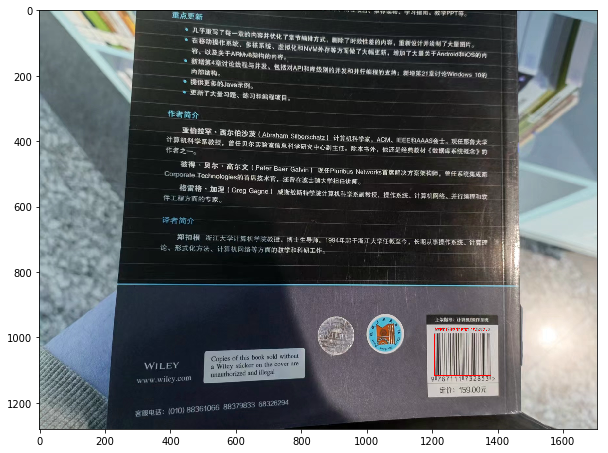

[INFO] Found QRCODE barcode: https://guziweb-cof.suntory.com.cn/#/?label=20221102103
[INFO] Found CODE128 barcode: 20221102103


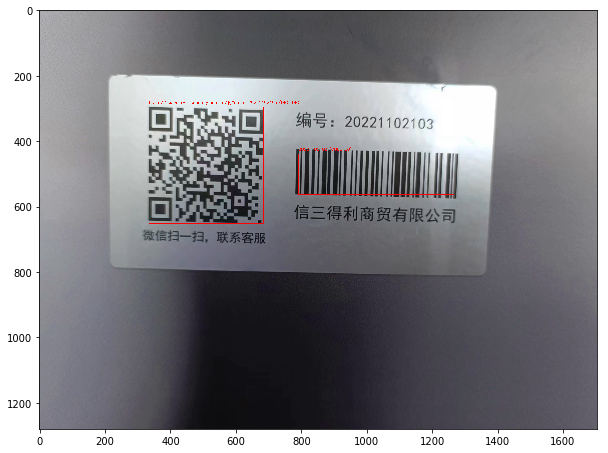

[INFO] Found QRCODE barcode: http://www.jiefeiwulian.com/?sim=353470090743657


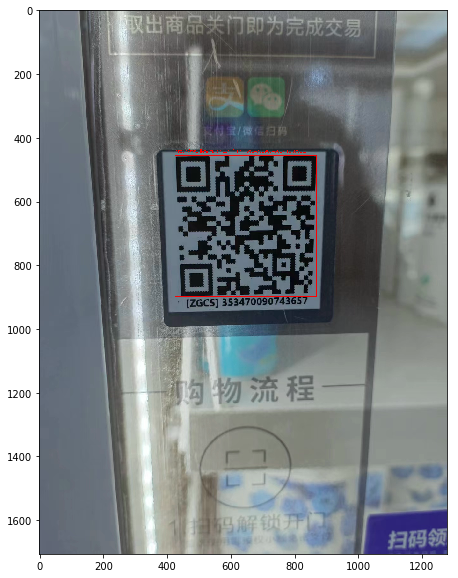

[INFO] Found QRCODE barcode: http://weixin.qq.com/r/XhystIbE_9uErcLX90lM


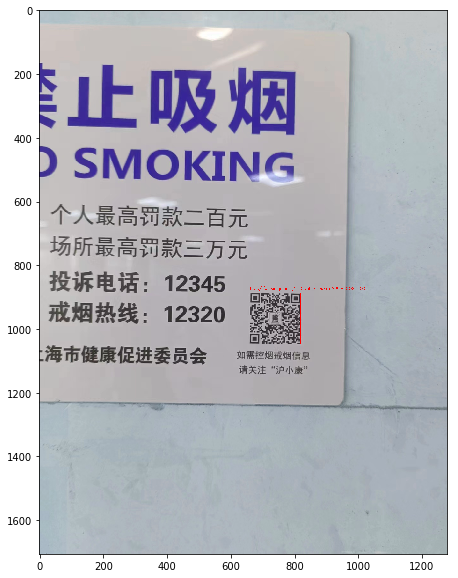

In [1]:

# coding: utf-8

# In[1]:
# 保存
import os
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
base = BaseOverlay("base.bit")
frame_in_w = 640
frame_in_h = 480
import cv2
videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH,frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT,frame_in_h);
print ("Capture device is open:"+ str(videoIn.isOpened()))
import numpy as np
ret, frame_vga = videoIn.read()
get_ipython().magic('matplotlib inline')
from matplotlib import pyplot as plt
import numpy as np

import sys
sys.path.append('/home/xilinx/.local/lib/python3.6/site-packages')
from pyzbar import pyzbar
from pyzbar. pyzbar import decode
import matplotlib.pyplot as plt
import cv2

# 图像路径，可根据自己的位置更改
image_paths = ["/home/xilinx/jupyter_notebooks/base/video/data/QRcode1.jpg", "/home/xilinx/jupyter_notebooks/base/video/data/QRcode2.jpg", "/home/xilinx/jupyter_notebooks/base/video/data/QRcode3.jpg","/home/xilinx/jupyter_notebooks/base/video/data/QRcode4.jpg"]
image_names = ["QRcode1.jpg","QRcode2.jpg","QRcode3.jpg","QRcode4.jpg"]
folder_path = "/home/xilinx/jupyter_notebooks/base/video/data"
# 下面是两个解码的函数，根据文件读取的方式不同而进行选择，new_2更为方便一些

def decode_new(image_paths):
     for image_path in image_paths:
   
        image = cv2.imread(image_path)
        barcodes = pyzbar.decode(image)
        for barcode in barcodes:
            (x, y, w, h) = barcode.rect
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)
            barcode_data = barcode.data.decode("utf-8")
            barcode_type = barcode.type
            text = "{} ({})".format(barcode_data, barcode_type)
            cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)
            print("[INFO] Found {} barcode: {}".format(barcode_type, barcode_data))
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.show()

def decode_new_2(folder_path,image_names):
     for image_name in image_names:

        image_path = os.path.join(folder_path,image_name)
        image = cv2.imread(image_path)

     
        barcodes = decode(image)

       
        for barcode in barcodes:
 
            (x, y, w, h) = barcode.rect
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)

  
            barcode_data = barcode.data.decode("utf-8")
            barcode_type = barcode.type


            text = "{} ({})".format(barcode_data, barcode_type)
            cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)
            print("[INFO] Found {} barcode: {}".format(barcode_type, barcode_data))

        
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.show()

decode_new(image_paths)
#decode_new_2(folder_path,image_names)

